In [1]:
# Set global seed
from numpy.random import seed
seed(42)

In [2]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import warnings
warnings.simplefilter('ignore')
import os
import numpy as np

In [3]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,0,21.948577,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,1,35.329481,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,1,23.461065,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,1,28.188906,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,0,23.238108,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [4]:
# Assign X (data) and y (target)
X = heart.drop("cardio", axis=1)
y = heart["cardio"].values.reshape(-1, 1)
X2 = X.values
print(X2.shape, y.shape)

(68606, 20) (68606, 1)


In [5]:
# Set up train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=1)

In [6]:
print(X_train)

[[ 62.  65. 136. ...   0.   0.   1.]
 [ 52.  64. 174. ...   0.   0.   1.]
 [ 53.  63. 174. ...   0.   0.   1.]
 ...
 [ 54.  67. 158. ...   0.   0.   1.]
 [ 53.  67. 180. ...   0.   1.   0.]
 [ 53.  59. 132. ...   0.   0.   1.]]


In [7]:
print(y_train)

[[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [8]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
# Define the model
from tensorflow.keras.models import Sequential

model = Sequential()

In [10]:
# Define first layer input shape
X_shape = X_train.shape
X_shape

(51454, 20)

In [11]:
# Add first layer
from tensorflow.keras.layers import Dense
model.add(Dense(units=20, activation='relu', input_shape=X_shape[1:]))
model.add(Dense(units=20, activation='relu'))

In [12]:
# Add Output
model.add(Dense(units=2, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
Total params: 882
Trainable params: 882
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model 
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
# Find the best model with checkpoint
from keras.callbacks import ModelCheckpoint

filepath="neuralnetwork.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Using TensorFlow backend.


In [16]:
# Fit (train) the model
best_nn = model.fit(X_train,
                    y_train_categorical,
                    epochs=500,
                    shuffle=True,
                    callbacks=callbacks_list,
                    verbose=2)

Train on 51454 samples
Epoch 1/500
51454/51454 - 6s - loss: 0.9508 - accuracy: 0.6360
Epoch 2/500
51454/51454 - 4s - loss: 0.5910 - accuracy: 0.6989
Epoch 3/500
51454/51454 - 4s - loss: 0.5842 - accuracy: 0.7069
Epoch 4/500
51454/51454 - 4s - loss: 0.5770 - accuracy: 0.7118
Epoch 5/500
51454/51454 - 4s - loss: 0.5724 - accuracy: 0.7159
Epoch 6/500
51454/51454 - 4s - loss: 0.5714 - accuracy: 0.7182
Epoch 7/500
51454/51454 - 4s - loss: 0.5669 - accuracy: 0.7211
Epoch 8/500
51454/51454 - 4s - loss: 0.5656 - accuracy: 0.7213
Epoch 9/500
51454/51454 - 4s - loss: 0.5597 - accuracy: 0.7248
Epoch 10/500
51454/51454 - 4s - loss: 0.5569 - accuracy: 0.7259
Epoch 11/500
51454/51454 - 4s - loss: 0.5565 - accuracy: 0.7237
Epoch 12/500
51454/51454 - 4s - loss: 0.5533 - accuracy: 0.7268
Epoch 13/500
51454/51454 - 4s - loss: 0.5542 - accuracy: 0.7269
Epoch 14/500
51454/51454 - 4s - loss: 0.5535 - accuracy: 0.7272
Epoch 15/500
51454/51454 - 4s - loss: 0.5526 - accuracy: 0.7272
Epoch 16/500
51454/51454 -

In [17]:
# Save model for future use
model.save('nn_model.h5')

In [18]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)

17152/1 - 1s - loss: 0.5608 - accuracy: 0.7294


In [19]:
# Test the model
import numpy as np
from keras.models import load_model

new_user_input = np.array([[61,62,205,130,80,37.49,1,0,0,0,1,1,0,0,1,0,1,0,0,1]])

perc_score_nn = 100*model_accuracy
print("Test Score: {:.2f} %".format(perc_score_nn))
predict_nn = model.predict(new_user_input)
predict_nn    

Test Score: 72.94 %


array([[0.17060989, 0.82939005]], dtype=float32)

In [94]:
# Loop through prediction to determine 0 or 1
predictions = model.predict(X_test)

greatest = []
for prediction in predictions:
    predictions = np.around(predictions)
    predictions = predictions.astype(int)
predictions

df = pd.DataFrame(predictions, columns = ["No Attack", "Attack"])
for index, row in df.iterrows():
    if row["No Attack"]> row["Attack"]:
        greatest.append(0)
    else:
        greatest.append(1)
        
print(len(greatest))
print(type(greatest))

17152
<class 'list'>


In [101]:
list_of_list = [[i] for i in greatest]


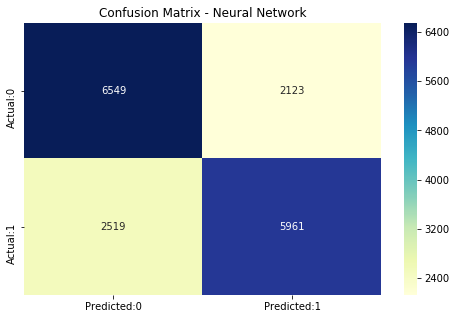

In [108]:
# Perform Confusion matrix on NN
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, list_of_list)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
plt.title("Confusion Matrix - Neural Network")
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.savefig("Confusion_Matrix_NN.png")

In [104]:
# Calculate Classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, list_of_list, target_names=["No Attack", "Attack"], output_dict = True)
df = pd.DataFrame(class_report).transpose()
df_to_html = df.to_html()
print(class_report)
print(df_to_html)

{'No Attack': {'precision': 0.7222099691221879, 'recall': 0.7551891143911439, 'f1-score': 0.7383314543404734, 'support': 8672}, 'Attack': {'precision': 0.7373824839188521, 'recall': 0.7029481132075471, 'f1-score': 0.7197536826853417, 'support': 8480}, 'accuracy': 0.7293610074626866, 'macro avg': {'precision': 0.72979622652052, 'recall': 0.7290686137993455, 'f1-score': 0.7290425685129076, 'support': 17152}, 'weighted avg': {'precision': 0.7297113057287477, 'recall': 0.7293610074626866, 'f1-score': 0.7291465485781415, 'support': 17152}}
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>f1-score</th>
      <th>precision</th>
      <th>recall</th>
      <th>support</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>No Attack</th>
      <td>0.738331</td>
      <td>0.722210</td>
      <td>0.755189</td>
      <td>8672.000000</td>
    </tr>
    <tr>
      <th>Attack</th>
      <td>0.719754</td>
      <td>0.737382</td>
      <td>0.7

With 0.1 threshold the Confusion Matrix is  
 [[ 358 8314]
 [  26 8454]] 
 with 8812 correct predictions and 26 Type II errors( False Negatives) 

 Sensitivity:  0.996933962264151 Specificity:  0.04128228782287823 



With 0.2 threshold the Confusion Matrix is  
 [[1820 6852]
 [ 251 8229]] 
 with 10049 correct predictions and 251 Type II errors( False Negatives) 

 Sensitivity:  0.9704009433962264 Specificity:  0.20987084870848707 



With 0.3 threshold the Confusion Matrix is  
 [[3493 5179]
 [ 784 7696]] 
 with 11189 correct predictions and 784 Type II errors( False Negatives) 

 Sensitivity:  0.9075471698113208 Specificity:  0.40279059040590404 



With 0.4 threshold the Confusion Matrix is  
 [[5188 3484]
 [1587 6893]] 
 with 12081 correct predictions and 1587 Type II errors( False Negatives) 

 Sensitivity:  0.8128537735849056 Specificity:  0.5982472324723247 



79.335%


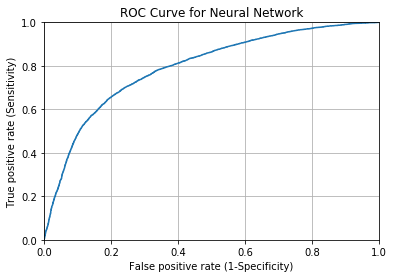

In [106]:
# ROC Curve
from sklearn.preprocessing import binarize

for i in range(1,5):
   cm2=0
   y_pred_prob_yes=model.predict_proba(X_test)
   y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
   cm2=confusion_matrix(y_test,y_pred2)
   print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
           'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
         'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
AUROC_Score_NN = roc_auc_score(y_test,y_pred_prob_yes[:,1])
score_NN = "{0:.3%}".format(AUROC_Score_NN)
print(score_NN)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Neural Network')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)
plt.savefig("ROC_Curve_NN.png")